# Preprocessing

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/My Drive/train.csv'

df = pd.read_csv(file_path)

In [7]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [10]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [11]:
df['Cabin'].isnull().sum()

np.int64(687)

In [12]:
df['deck'] = df['Cabin'].astype(str).str[0]
deck_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'n': 8}
df['deck_num'] = df['deck'].map(deck_mapping)


In [13]:
df = df.drop(columns=['Cabin', 'deck','PassengerId','Name','Ticket'])

In [14]:
family_size=[]
for i in range(len(df)):
    family_size.append(df['SibSp'][i]+df['Parch'][i]+1)
df['Family_Size']=family_size

In [15]:
df['is_alone'] = (df['Family_Size'] == 1).astype(int)
df['fare_per_person'] = df['Fare'] / df['Family_Size']
df['age_bin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=False)
df['fare_bin'] = pd.qcut(df['Fare'], 4, labels=False)

In [16]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,deck_num,Family_Size,is_alone,fare_per_person,age_bin,fare_bin
0,0,3,1,22.0,1,0,7.2500,0.0,8,2,0,3.62500,2.0,0
1,1,1,0,38.0,1,0,71.2833,1.0,2,2,0,35.64165,3.0,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   Age              714 non-null    float64
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    float64
 7   Embarked         889 non-null    float64
 8   deck_num         891 non-null    int64  
 9   Family_Size      891 non-null    int64  
 10  is_alone         891 non-null    int64  
 11  fare_per_person  891 non-null    float64
 12  age_bin          714 non-null    float64
 13  fare_bin         891 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 97.6 KB


# EDA


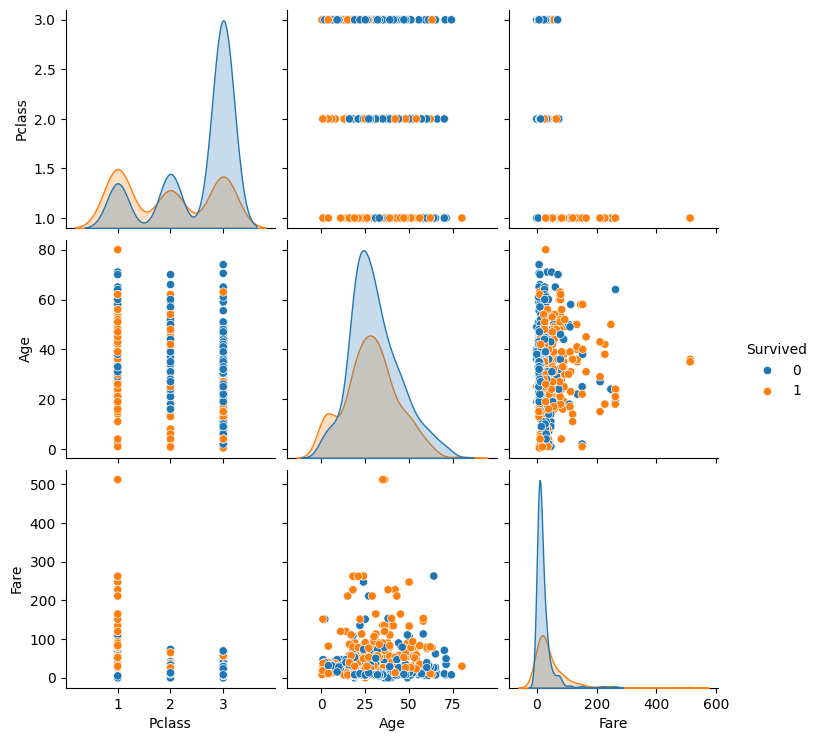

In [18]:
sns.pairplot(df[['Pclass','Age','Fare','Survived']],hue='Survived')

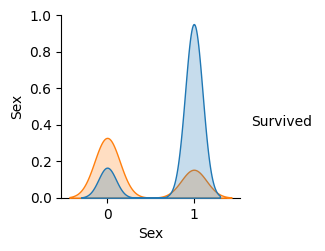

In [19]:
sns.pairplot(df[['Sex', 'Survived']], hue='Survived')


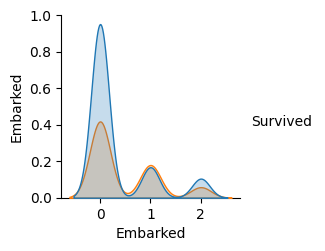

In [20]:
sns.pairplot(df[['Embarked', 'Survived']], hue='Survived')

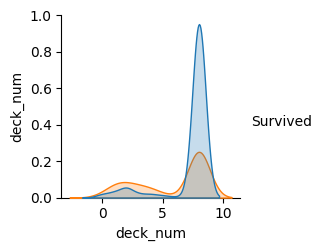

In [21]:
sns.pairplot(df[['deck_num', 'Survived']], hue='Survived')

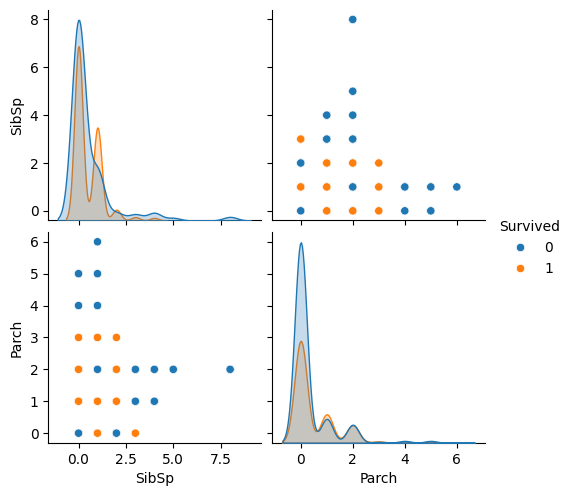

In [22]:
sns.pairplot(df[['SibSp','Parch','Survived']],hue='Survived')

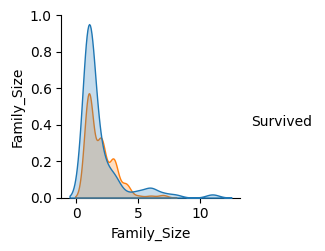

In [23]:
sns.pairplot(df[['Family_Size','Survived']],hue='Survived')

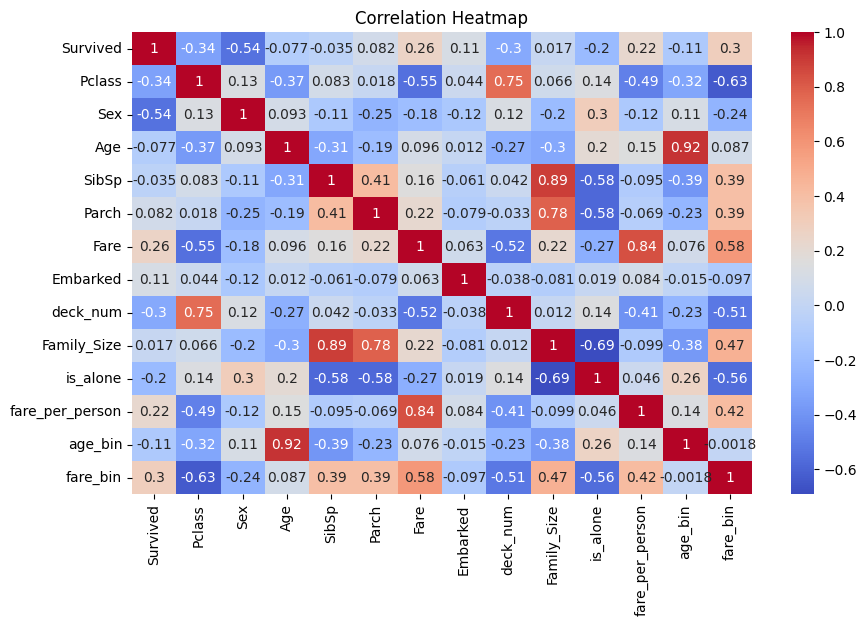

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

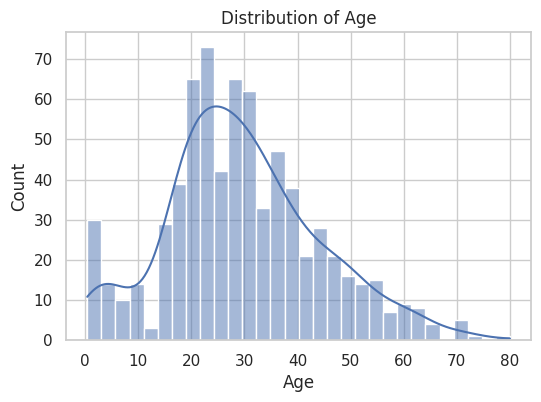

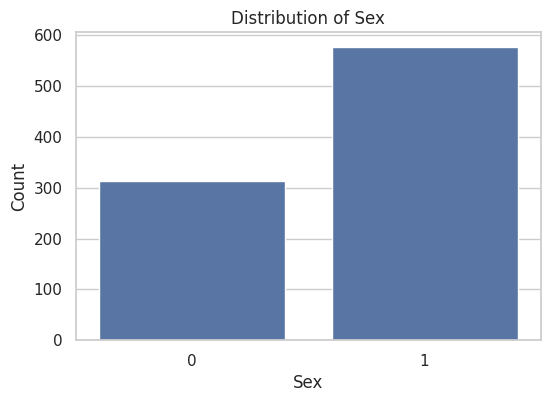

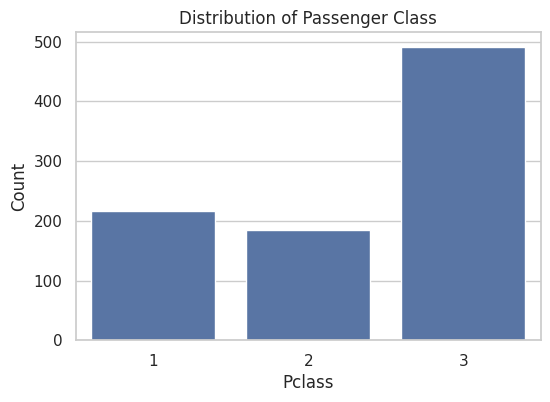

In [25]:
sns.set(style="whitegrid")

# 1. Histogram for Age
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2. Countplot for Sex (since it's categorical, not numerical)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# 3. Countplot for Pclass (also categorical)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Distribution of Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

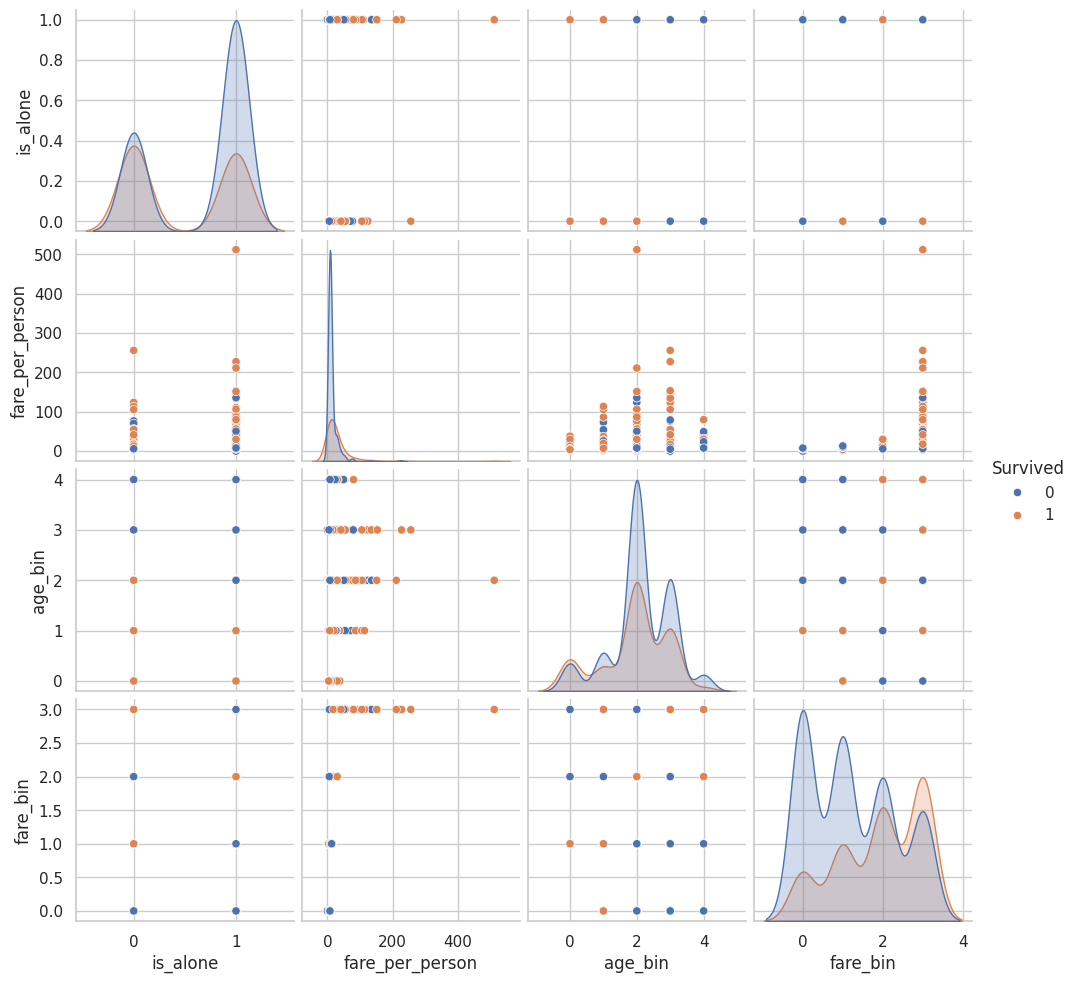

In [26]:
sns.pairplot(df[['is_alone','fare_per_person','age_bin','fare_bin','Survived']],hue='Survived')

# Data for model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Pipeline


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [31]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Family_Size', 'deck_num','fare_per_person','age_bin','fare_bin']
categorical_features = ['Sex', 'Embarked','Pclass','is_alone']

scaler = StandardScaler()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lor = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression())
])
param_grid_lor = [
    # L2 penalty
    {
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
         'classifier__C': [0.01, 0.1,0.0001,0.00001, 1, 2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
        'classifier__l1_ratio': [0.1,0.2,0.3,0.4,0.6,0.7, 0.5, 0.9],
        'classifier__max_iter': [1000,2000,500,3000,1500,1250]
    },
    # L1 penalty (only liblinear and saga support it)
    {
        'classifier__penalty': ['l1'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__C': [0.01, 0.1,0.0001,0.00001, 1, 2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
        'classifier__l1_ratio': [0.1,0.2,0.3,0.4,0.6,0.7, 0.5, 0.9],
        'classifier__max_iter': [1000,2000,500,3000,1500,1250]
    },
    # ElasticNet penalty (only saga supports it)
    {
        'classifier__penalty': ['elasticnet'],
        'classifier__solver': ['saga'],
        'classifier__C': [0.01, 0.1,0.0001,0.00001, 1, 2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100],
        'classifier__l1_ratio': [0.1,0.2,0.3,0.4,0.6,0.7, 0.5, 0.9],
        'classifier__max_iter': [1000,2000,500,3000,1500,1250]
    }
]


grid_lor = RandomizedSearchCV(lor, param_grid_lor, cv=5, scoring='accuracy', n_jobs=-1)

In [34]:
grid_lor.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Fare',
                                                                                'SibSp',
                                                                                'Parch',
                                                                                'Family_Size',
                                                                                'deck_num',
                                                                                'fare_per_person',
                                                                                'age_bin',
                                                                                'fare_bin']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='mo...
                                         'classifier__penalty': ['l1'],
                                         'classifier__solver': ['liblinear',
                                                                'saga']},
                                        {'classifier__C': [0.01, 0.1, 0.0001,
                                                           1e-05, 1, 2, 3, 4, 5,
                                                           6, 7, 8, 9, 10, 20,
                                                           30, 40, 50, 60, 70,
                                                           80, 90, 100],
                                         'classifier__l1_ratio': [0.1, 0.2, 0.3,
                                                                  0.4, 0.6, 0.7,
                                                                  0.5, 0.9],
                                         'classifier__max_iter': [1000, 2000,
                                                                  500, 3000,
                                                                  1500, 1250],
                                         'classifier__penalty': ['elasticnet'],
                                         'classifier__solver': ['saga']}],
                   scoring='accuracy')

In [35]:
print("Best parameters:", grid_lor.best_params_)
print("Best cross-validated accuracy:", grid_lor.best_score_)

best_lor = grid_lor.best_estimator_

Best parameters: {'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__max_iter': 3000, 'classifier__l1_ratio': 0.9, 'classifier__C': 1}
Best cross-validated accuracy: 0.7968489109283786


In [36]:
scores = cross_val_score(best_lor, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Cross-validation scores: [0.80446927 0.79775281 0.78089888 0.78089888 0.82022472]
Mean Accuracy: 0.7968


In [37]:
# y_pred = best_model.predict(X_test)
# # print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

In [38]:
# classification_report(y_test, y_pred)

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',  DecisionTreeClassifier())
])
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],  # log_loss for better probabilistic splits (since sklearn 1.1)
    'classifier__max_depth': [None, 1,2,4,8,12,15,18,22,25,6,9,3, 5, 7, 10, 15, 20, 30],
    'classifier__min_samples_split': [2, 5, 8,3,4,6,7,9,12,15,18,22,25,30,35,40,45,10, 20],
    'classifier__min_samples_leaf': [2, 5, 8,3,4,6,7,9,12,15,18,22,25,30,35,40,45,10, 20],
    'classifier__max_features': [None, 'sqrt', 'log2']
}
grid_dt= RandomizedSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

In [41]:
grid_dt.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Fare',
                                                                                'SibSp',
                                                                                'Parch',
                                                                                'Family_Size',
                                                                                'deck_num',
                                                                                'fare_per_person',
                                                                                'age_bin',
                                                                                'fare_bin']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='mo...
                   param_distributions={'classifier__criterion': ['gini',
                                                                  'entropy',
                                                                  'log_loss'],
                                        'classifier__max_depth': [None, 1, 2, 4,
                                                                  8, 12, 15, 18,
                                                                  22, 25, 6, 9,
                                                                  3, 5, 7, 10,
                                                                  15, 20, 30],
                                        'classifier__max_features': [None,
                                                                     'sqrt',
                                                                     'log2'],
                                        'classifier__min_samples_leaf': [2, 5,
                                                                         8, 3,
                                                                         4, 6,
                                                                         7, 9,
                                                                         12, 15,
                                                                         18, 22,
                                                                         25, 30,
                                                                         35, 40,
                                                                         45, 10,
                                                                         20],
                                        'classifier__min_samples_split': [2, 5,
                                                                          8, 3,
                                                                          4, 6,
                                                                          7, 9,
                                                                          12,
                                                                          15,
                                                                          18,
            

In [42]:
print("Best parameters:", grid_dt.best_params_)
print("Best cross-validated accuracy:", grid_dt.best_score_)
best_dt=grid_dt.best_estimator_

Best parameters: {'classifier__min_samples_split': 15, 'classifier__min_samples_leaf': 5, 'classifier__max_features': None, 'classifier__max_depth': 8, 'classifier__criterion': 'log_loss'}
Best cross-validated accuracy: 0.814864101437449


In [43]:
scores_dt=cross_val_score(best_dt, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores_dt)
print("Mean Accuracy: {:.4f}".format(np.mean(scores_dt)))

Cross-validation scores: [0.77653631 0.79213483 0.87078652 0.80898876 0.83146067]
Mean Accuracy: 0.8160


In [44]:
importances = best_dt.named_steps['classifier'].feature_importances_

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=Pipeline([
    ('preprocess', preprocessor),
    ('classifier',RandomForestClassifier())
])
param_grid_rf = {
    'classifier__n_estimators': [10,20,30,40,50,60,70,80,90,110,120,130,140,150,170,180,220,240,260,280,320,340,400,500,360,100, 200, 300,500,1000],                     # Number of trees
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],        # Splitting strategy
    'classifier__max_depth': [None,1,2,3,4,5,6,7,8,9,12,15,18,22,25,35,28,40,38,45,48,52,55,58,62,65,68,10, 20, 30, 50, 70],             # Tree depth
    'classifier__min_samples_split': [2, 5, 8,3,4,6,7,9,12,15,18,22,25,30,35,40,45,10, 20],                     # Min samples to split node
    'classifier__min_samples_leaf': [2, 5, 8,3,4,6,7,9,12,15,18,22,25,30,35,40,45,10, 20,1],                       # Min samples in leaf node
    'classifier__max_features': ['sqrt', 'log2', None],              # Features considered per split
    'classifier__bootstrap': [True, False],                          # Sampling method
    'classifier__class_weight': [None, 'balanced']                   # Handling imbalance
}
grid_rf=RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

In [47]:
grid_rf.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Fare',
                                                                                'SibSp',
                                                                                'Parch',
                                                                                'Family_Size',
                                                                                'deck_num',
                                                                                'fare_per_person',
                                                                                'age_bin',
                                                                                'fare_bin']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='mo...
                                        'classifier__max_features': ['sqrt',
                                                                     'log2',
                                                                     None],
                                        'classifier__min_samples_leaf': [2, 5,
                                                                         8, 3,
                                                                         4, 6,
                                                                         7, 9,
                                                                         12, 15,
                                                                         18, 22,
                                                                         25, 30,
                                                                         35, 40,
                                                                         45, 10,
                                                                         20,
                                                                         1],
                                        'classifier__min_samples_split': [2, 5,
                                                                          8, 3,
                                                                          4, 6,
                                                                          7, 9,
                                                                          12,
                                                                          15,
                                                                          18,
                                                                          22,
                                                                          25,
                                                                          30,
                                                                          35,
                                                                          40,
                                                                          45,
                                                                          10,
                    

In [48]:
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validated accuracy:", grid_rf.best_score_)
best_rf=grid_rf.best_estimator_

Best parameters: {'classifier__n_estimators': 90, 'classifier__min_samples_split': 15, 'classifier__min_samples_leaf': 3, 'classifier__max_features': None, 'classifier__max_depth': 25, 'classifier__criterion': 'gini', 'classifier__class_weight': None, 'classifier__bootstrap': True}
Best cross-validated accuracy: 0.8260875023539012


In [49]:
scores_rf=cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores_rf)
print("Mean Accuracy: {:.4f}".format(np.mean(scores_rf)))

Cross-validation scores: [0.76536313 0.79213483 0.88764045 0.80898876 0.86516854]
Mean Accuracy: 0.8239


In [50]:
importances = best_rf.named_steps['classifier'].feature_importances_

In [51]:
importances

array([1.38965094e-01, 8.22876591e-02, 1.33058177e-02, 3.46298491e-03,
       2.86803418e-02, 3.13909784e-02, 1.24465387e-01, 8.28508492e-03,
       3.95352392e-03, 4.38990632e-01, 1.66450257e-02, 1.09467913e-01,
       9.95562592e-05])

# Testing

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
def preprocess(df):
    df['Sex']=df['Sex'].map({'male':1,'female':0})
    df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})
    df['deck'] = df['Cabin'].astype(str).str[0]
    deck_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7, 'n': 8}
    df['deck_num'] = df['deck'].map(deck_mapping)
    df = df.drop(columns=['Cabin', 'deck','PassengerId','Name','Ticket'])
    family_size=[]
    for i in range(len(df)):
        family_size.append(df['SibSp'][i]+df['Parch'][i]+1)
    df['Family_Size']=family_size
    df['is_alone'] = (df['Family_Size'] == 1).astype(int)
    df['fare_per_person'] = df['Fare'] / df['Family_Size']
    df['age_bin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=False)
    df['fare_bin'] = pd.qcut(df['Fare'], 4, labels=False)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    return df

In [54]:
file_path = '/content/drive/My Drive/gender_submission.csv'

actual_output = pd.read_csv(file_path)

In [55]:
file_path = '/content/drive/My Drive/test.csv'

test = pd.read_csv(file_path)

In [56]:
test=preprocess(test)

In [57]:
y_pred_lor = best_lor.predict(test)
y_pred_dt = best_dt.predict(test)
y_pred_rf = best_rf.predict(test)

In [58]:
print(test.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'deck_num', 'Family_Size', 'is_alone', 'fare_per_person', 'age_bin',
       'fare_bin'],
      dtype='object')


In [59]:
print('Accuracy Logistic Regression',accuracy_score(actual_output['Survived'],y_pred_lor))
print('Accuracy Random Forest',accuracy_score(actual_output['Survived'],y_pred_rf))
print('Accuracy Decision Tree',accuracy_score(actual_output['Survived'],y_pred_dt))

Accuracy Logistic Regression 0.9401913875598086
Accuracy Random Forest 0.8755980861244019
Accuracy Decision Tree 0.8971291866028708


In [60]:
print('confusion_matrix Logistic Regression',confusion_matrix(actual_output['Survived'],y_pred_lor))
print('confusion_matrix Random Forest',confusion_matrix(actual_output['Survived'],y_pred_rf))
print('confusion_matrix Decision Tree',confusion_matrix(actual_output['Survived'],y_pred_dt))

confusion_matrix Logistic Regression [[251  15]
 [ 10 142]]
confusion_matrix Random Forest [[245  21]
 [ 31 121]]
confusion_matrix Decision Tree [[248  18]
 [ 25 127]]


In [61]:
print('confusion_matrix Logistic Regression',classification_report(actual_output['Survived'],y_pred_lor))
print('confusion_matrix Random Forest',classification_report(actual_output['Survived'],y_pred_rf))
print('confusion_matrix Decision Tree',classification_report(actual_output['Survived'],y_pred_dt))

confusion_matrix Logistic Regression               precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.90      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

confusion_matrix Random Forest               precision    recall  f1-score   support

           0       0.89      0.92      0.90       266
           1       0.85      0.80      0.82       152

    accuracy                           0.88       418
   macro avg       0.87      0.86      0.86       418
weighted avg       0.87      0.88      0.87       418

confusion_matrix Decision Tree               precision    recall  f1-score   support

           0       0.91      0.93      0.92       266
           1       0.88      0.84      0.86       152

    accuracy                           0.90       418
   macro avg       0.89      

# Saving Output

In [62]:
submission = pd.read_csv('/content/drive/My Drive/test.csv')
submission['Survived'] = y_pred_lor.astype(int)
submission[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)

In [63]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>